로지스틱회귀: 모든 값이 0과 1 사이의 값에 들어감.   
로지스틱 함수(시그모이드 함수)를 집어 넣으면 s-커브 함수가 나타남.   

<확률적>
따라서 로지스틱 함수가 0.7이 나왔다는 것은 확률이 70% 아닐 확률이 30%라는 뜻으로 해석 할수 있음.   
  
g(z)가 0 보다 같거나 큰 경우 y = 1  
g(z)가 0 보다 작은 경우 y = 0    
  
  ### 비용함수  파라미터 값을 찾기 위한 것.  
  
covex 로컬 미니멈이  
  
비용함수를 convex하게 만드는 것.  
y는 0 or 1 
  
 y1이면 0으로 갈수록 비용이 많이 들음.  
 y가0이면 1으로 갈수록 비용이 많이 들음.  
   

### 경사하강 회귀 계수를 수렴할떄 까지 업데이트 하는 것  
  
선형회귀와 경사하강과 동일해짐.  시그모이드가 있느냐 없느냐에만 따라 수식의 차이가 있을뿐 똑같음.  
  
최적화 알고리즘  
최적의 값을 적용하기 위한 알고리즘. 
  


# 로지스틱회귀 실습#1 
  
iris 데이터 셋
  
회귀 계수가 3개 나올 거임.  상대적인 분류 이기 때문에 본인이 확인 해야함.

In [1]:
#데이터 불러오기
import seaborn as sns #seaborn을 불러오고 네임스페이스를 sns로 축약
iris = sns.load_dataset('iris')  #iris라는 변수명으로 Iris 데이터셋 download

X = iris.drop('species', axis=1) #'species'열을 drop하고 input X를 정의
y = iris['species']

In [2]:
#y data를 범주형으로 변환
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() #class label
y = classle.fit_transform(iris['species'].values) #species 열의 문자열을 범주형으로 변환

In [3]:
#전체 데이터를 학습과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split

#X(입력변수)와 y(종속변수)로 이루어진 데이터를 학습과 테스트 데이터넷으로 각각 70%, 30%의 비율로 나눔   # 원하는데로 바꿀 수 있음.
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y) 

In [4]:
# 표준화    # 정규화를 수행할 경우 회귀계수 간 상대적 중요도에 대한 올바른 해석을 위해 표준화가 필요함  
from sklearn.preprocessing import StandardScaler        # StandardScaler 표준화 진행
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# Logistic regression       # 로지스틱 회귀 클래스 호출 
from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression(C=200, random_state=1)  #C=1/λ, 디폴트:L2정규화      # 200 / 1           C는 cost function 
Logit.fit(X_train_std, y_train)
y_train_pred = Logit.predict(X_train_std)
y_test_pred = Logit.predict(X_test_std)

In [6]:
# Accuracy score        # 정확도
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred)) # 학습 데이터 정확도 
print(accuracy_score(y_test,y_test_pred))    # 테스트 데이터 정확도

0.9809523809523809
1.0


In [7]:
# Confusion matrix
from sklearn.metrics import confusion_matrix        # 정확도 행렬 
print(confusion_matrix(y_test, y_test_pred))  

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [18]:
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# import matplotlib.pyplot as plt  
# # from sklearn.svm import SVC
# # clf = SVC(random_state=0)
# #Label = []

# plot = plot_confusion_matrix( # 분류 모델
#                              X_train_std, y_test, # 예측 데이터와 예측값의 정답(y_true)  
#                              cmap=plt.cm.bwr_r, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
#                              normalize=None # 'true', 'pred', 'all' 중에서 지정 가능. default=None
#                             )
# plot.ax_.set_title('Confusion Matrix')


# display_labels=label, # 표에 표시할 labels

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'

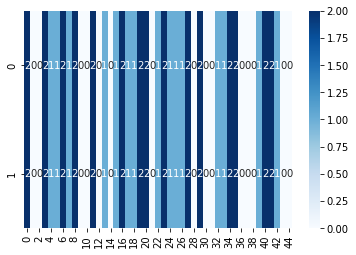

In [35]:
import seaborn as sns
import pandas as pd     
import numpy as np

y_comined = pd.DataFrame(data = [y_test, y_test_pred])

correlation_matrix = None

sns.heatmap(data = y_comined, annot = True, cmap='Blues')
plt.show()